In [1]:
import os
import datetime
import time

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
folder_path = 'data\\5y\\'
file_name = 'BTCUSDT-30m-from-2017-08-to-2021-08'
csv_path = folder_path + file_name +'.csv'

df = pd.read_csv(csv_path)

In [3]:
def low(df, curr, p):
    return min(df['Low'][range(curr - p + 1, curr + 1)])

#print(low(df, df.index[-1], 9))

def high(df, curr, p):
    return max(df['High'][range(curr - p + 1, curr + 1)])

#print(high(df, df.index[-1], 9))

In [4]:
def sma(df, w):
    return df.iloc[:].rolling(window=w).mean()

In [5]:
def rsv(df, p):
    return [(df['Close'][df.index[curr]] - low(df, curr, p))/(high(df, curr, p) - low(df, curr, p)) for curr in range(p, len(df))]


def k(df_l, RSV, p):
    K = [0.5]
    for i in range(1, df_l - p):
        K.append((2/3)*K[i-1] + (1/3)*RSV[i])
    return K

#k(len(df), RSV, 9)

def d(df_l, K, q):
    D = [0.5]
    for i in range(1, len(K)):
        D.append((2/3)*D[i-1] + (1/3)*K[i])
    return D

#d(len(df), K, 9)

def j(df_l, K, D, p):
    return [3*K[i] - 2*D[i] for i in range(len(K))]

def kdj(df, kp, dp, jp):
    RSV = rsv(df, kp)
    K = k(len(df), RSV, kp)
    D = d(len(df), K, dp)
    J = j(len(df), K, D, jp)
    return K, D, J


In [6]:
# def fastStoc(df, curr, p):
#     return (df['Close'][curr] - low(df, curr, p))/(high(df, curr, p) - low(df, curr, p))

# def slowStoc(df, curr, p, q):
#     fs = [fastStoc(df, i, p) for i in range(curr - q, curr + 1)]
#     return sum(fs)/q, fs[-1]

# def verySlowStoc(df, curr, p, q):
#     ss, fs = map(list,zip(*[slowStoc(df, i, p, q) for i in range(curr - q + 1, curr + 1)]))
#     print(ss)
#     return sum(ss)/q, ss[-1], fs[-1]

# J 0.0319979190826416
# (0.3415338635409532, 0.32324905139644416, 0.22996959196662373)

def fastStoc(df, curr, p):
    return (df['Close'][curr] - low(df, curr, p))/(high(df, curr, p) - low(df, curr, p))

def slowStoc(df, curr, p, q):
    fs = [fastStoc(df, i, p) for i in range(curr - q, curr + 1)]
    return sum(fs)/q, fs[-1]

def verySlowStoc(df, curr, p, q):
    fs = [fastStoc(df, i, p) for i in range(curr - (q), curr + 1)]
    ss = [sum(fs[i:i + q])/q for i in range(len(fs) - q + 1)]
    
    return sum(ss)/len(ss), ss[-1], fs[-1]

In [7]:
# csv_path = 'data\\10d\\BTCUSDT-30m-from-2017-08-to-2021-08.csv'
# df = pd.read_csv(csv_path)

# p = 10
# q = 3

# t = time.time()
# print(fastStoc(df, df.index[-1], p))
# print("K " + str(time.time() - t))
# t = time.time()
# print(slowStoc(df, df.index[-1], p, q))
# print("D " + str(time.time() - t))
# t = time.time()
# print(verySlowStoc(df, df.index[-1], p, q))
# print("J " + str(time.time() - t))

In [8]:
# %matplotlib notebook
# from ipywidgets import *

# csv_path = 'data\\10d\\BTCUSDT-30m-from-2017-08-to-2021-08.csv'
# df = pd.read_csv(csv_path)

# def update(w):
#     x = 100
#     ax1.set_xlim(w, w + x)
#     ax2.set_xlim(w, w + x)

# p = 10
# q = 3
    
# fs = [fastStoc(df, i, p) for i in range(p+1, len(df))]
# ss = [slowStoc(df, i, p, q) for i in range(p+q+1, len(df))]
# col = [fs[i] - ss[i] for i in range(len(ss))]

# ax1 = plt.subplot(2,1,1)
# ax1.plot(df['Close'], label = "BTCUSDT")
# plt.legend()

# ax2 = plt.subplot(2,1,2)
# ax2.plot(fs, label = "fs")
# ax2.plot(ss, label = "ss")
# plt.legend()

# for i, e in enumerate(col):
#     if e > 0 and ss[i] > 0.6:
#         ax1.axvline(x=i, color="green", alpha=0.3)
#         ax2.axvline(x=i, color="green", alpha=0.3)
#     elif e < 0 and ss[i] < 0.4:
#         ax1.axvline(x=i, color="red", alpha=0.3)
#         ax2.axvline(x=i, color="red", alpha=0.3)

# interact(update, w = widgets.FloatSlider(value=1, min=1, max=len(df), step=10))

In [9]:
def tri(i):
    global df
    return max((df['High'][i] - df['Low'][i]), abs(df['High'][i] - df['Close'][i-1]), abs(df['Low'][i] - df['Close'][i-1]))

def trip(curr, p):
    global df
    return sum([tri(i) for i in range(curr - p + 1, curr + 1)])

def atr(df, curr, p):
    return (1/p)*sum([tri(df, i) for i in range(curr - p, curr)])

def maatr(df, curr, p):
    ATR = pd.DataFrame([atr(df, curr, p) for i in range(curr - p, curr)])
    SMA = sma(ATR, p)
    return SMA

In [10]:
def upmove(curr):
    global df
    # 1 value
    return df['High'][curr] - df['High'][curr - 1]

def downmove(curr):
    global df
    # 1 value
    return df['Low'][curr - 1] - df['Low'][curr]

def dmplus(curr):
    global df
    # 1 value
    return max(0, upmove(curr))

def dmminus(curr):
    global df
    # 1 value
    return max(0, downmove(curr))

def dmpplus(curr, p):
    global df
    # 1 value
    return sum([dmplus(i) for i in range(curr - p + 1, curr + 1)])

def dmpminus(curr, p):
    global df
    # 1 value
    return sum([dmminus(i) for i in range(curr - p + 1, curr + 1)])

def diplus(curr, p):
    global df
    # 1 value
    return dmpplus(curr, p)/trip(curr, p)

def diminus(curr, p):
    global df
    # 1 value
    return dmpminus(curr, p)/trip(curr, p)

def adx(curr, p):
    global df
    # 1 value
    dp = diplus(curr, p)
    # 1 value
    dm = diminus(curr, p)
    # 1 value
    dmdf = dp - dm
    # 1 value
    dpdf = dp + dm
    # 1 value
    DX = abs(dmdf)/dpdf
    return DX, dp, dm

def adx_plus(df, curr, p, q):
    dps = [diplus(df, i, p) for i in range(curr - q + 1, curr + 1)]
    dms = [diminus(df, i, p) for i in range(curr - q + 1, curr + 1)]
#     dp = dps[-1]
#     dm = dms[-1]
    dp = sum(dps)/q
    dm = sum(dms)/q
    dpa = dps[-1] - dps[-2]
    dma = dms[-1] - dms[-2]
    dmdf = pd.DataFrame([dp - dm])
    dpdf = pd.DataFrame([dp + dm])
    DX = abs(dmdf[0])/dpdf[0]
    return sum(DX)/len(DX), dp, dm, dpa, dma

In [11]:
# %matplotlib notebook
# from ipywidgets import *

# csv_path = 'data\\10d\\BTCUSDT-30m-from-2017-08-to-2021-08.csv'
# df = pd.read_csv(csv_path)

# def update(w):
#     x = 100
#     ax1.set_xlim(w, w + x)
#     ax2.set_xlim(w, w + x)

# p = 10
    
# dp = [diplus(df, i, p) for i in range(p+1, len(df))]
# dm = [diminus(df, i, p) for i in range(p+1, len(df))]
# ADX = [adx(df, i, p) for i in range(p+1, len(df))]

# ax1 = plt.subplot(2,1,1)
# ax1.plot(df['Close'], label = "BTCUSDT")
# plt.legend()

# ax2 = plt.subplot(2,1,2)
# ax2.plot(dp, label = "dp")
# ax2.plot(dm, label = "dm")
# ax2.plot(ADX, label = "ADX")
# plt.legend()

# interact(update, w = widgets.FloatSlider(value=1, min=1, max=len(df), step=10))

In [12]:
def rs(df, p):
    u = []
    d = []
    for i in range(df.index[-1] - p, df.index[-1]):
        if(df["Close"][i] > df["Open"][i]):
            u.append(df["Close"][i] - df["Open"][i])
        else:
            d.append(df["Open"][i] - df["Close"][i])
    avgup = sum(u)/p
    avgdown = sum(d)/p
    
    return avgup/avgdown

def rsi(df, p):
    return 1 - (1/(1+rs(df, p)))

In [13]:
# %matplotlib notebook
# from ipywidgets import *

# csv_path = 'data\\10d\\BTCUSDT-30m-from-2017-08-to-2021-08.csv'
# df = pd.read_csv(csv_path)

# def update(w):
#     x = 100
#     ax1.set_xlim(w, w + x)
#     ax2.set_xlim(w, w + x)
#     ax3.set_xlim(w, w + x)

# p = 10
# q = 3
    
# fs = [fastStoc(df, i, p) for i in range(p+1, len(df))]
# ss = [slowStoc(df, i, p, q) for i in range(p+q+1, len(df))]
# col = [fs[i] - ss[i] for i in range(len(ss))]

# ADX, dp, dm = list(map(list, zip(*[adx(df, i, q*6) for i in range(q*6+1, len(df))])))

# ax1 = plt.subplot(3,1,1)
# ax1.plot(df['Close'], label = "BTCUSDT")
# plt.legend()

# ax2 = plt.subplot(3,1,2)
# ax2.plot(fs, label = "fs")
# ax2.plot(ss, label = "ss")
# plt.legend()

# ax3 = plt.subplot(3,1,3)
# ax3.plot(dp, label = "dp")
# ax3.plot(dm, label = "dm")
# ax3.plot(ADX, label = "ADX")
# plt.legend()

# for i, e in enumerate(col[q*6:]):
#     if e > 0 and ss[i] > 0.7 and dp[i] > dm[i] and ADX[i] > 0.25:
#         ax1.axvline(x=i, color="green", alpha=0.3)
#         ax2.axvline(x=i, color="green", alpha=0.3)
#         ax3.axvline(x=i, color="green", alpha=0.3)
#     elif e < 0 and ss[i] < 0.3 and dp[i] < dm[i] and ADX[i] > 0.25:
#         ax1.axvline(x=i, color="red", alpha=0.3)
#         ax2.axvline(x=i, color="red", alpha=0.3)
#         ax3.axvline(x=i, color="red", alpha=0.3)

# interact(update, w = widgets.FloatSlider(value=1, min=1, max=len(df), step=10))

In [14]:
#buy a certain amount BTC
#Now with TAXES YEAH
def buy_t(acc_usdt, acc_btc, price, buy_amount):
    if(acc_usdt >= buy_amount):
        acc_usdt -= (buy_amount - buy_amount*0.001)*price
        acc_btc += buy_amount
    return acc_usdt, acc_btc

#sell a certain amount BTC
#Now with TAXES YEAH
def sell_t(acc_usdt, acc_btc, price, sell_amount):
    if(acc_btc >= sell_amount):
        acc_usdt += (sell_amount - sell_amount*0.001)*price
        acc_btc -= sell_amount
    return acc_usdt, acc_btc

In [15]:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [16]:
def sell(price, weight):
    global acc_usdt
    global acc_btc
    
    out = "Trying to sell..."
    quantity = truncate(acc_btc*weight, 6)
    if quantity > 0.0001:
        acc_usdt, acc_btc = sell_t(acc_usdt, acc_btc, price, quantity)
        out = out + "Sold " + str(quantity) + "BTC at " + str(price)
        trade = True
        trade_type = "SELL"
    else:
        out = out + "Trade too small"
        trade = False
        trade_type = "NONE"
    return out, trade_type, trade

def buy(price, weight):
    global acc_usdt
    global acc_btc
    
    out = "Trying to buy..."
    quantity = truncate(((acc_usdt*weight)/price), 6)
    if quantity > 0.0001:
        acc_usdt, acc_btc = buy_t(acc_usdt, acc_btc, price, quantity)
        out = out + "Bought " + str(quantity) + "BTC at " + str(price)
        trade = True
        trade_type = "BUY"
    else:
        out = out + "Trade too small"
        trade = False
        trade_type = "NONE"
    return out, trade_type, trade


In [17]:
def trader(p, q, last_trade_price, last_trade_type):
    global acc_usdt
    global acc_btc
    global df
    
#     kp = w
#     dp = w
#     jp = w
#     K, D, J = kdj(df, kp, dp, jp)
    
#     k_curr = K[-1]
#     d_curr = D[-1]
#     j_curr = J[-1]
   
#     RS = rs(df, 10)
#     RSI = rsi(df, 10)
    
#     ADX, dp, dm = adx(df, df.index[-1], 2*w)

    k_curr = 0
    d_curr = 0
    j_curr = 0

    RS = 0
    RSI = 0
    TR = 0
    ATR = 0
    
    dp = 0
    dm = 0
    ADX = 0
    dma = 0
    dpa = 0
    
    i = df.index[-1]
    
#     j_curr, d_curr, k_curr = verySlowStoc(df, i, p, q)

    ADX, dp, dm = adx(i, q)
    
#     ADX, dp, dm, dpa, dma = adx_plus(df, i, q*6, q)
    
    weight = 1
    
    price = df['Close'][i]
    trade = True
    trade_type = "NONE"

    # BUY
    if(last_trade_type != 'BUY' and ((dp > dm and ADX > 0.25))):
        out, trade_type, trade = buy(price, weight)
    # SELL
    if(last_trade_type != 'SELL' and (dp < dm and ADX > 0.25)):
        out, trade_type, trade = sell(price, weight)
    
    if(trade_type == "NONE"):
        out = "No trade"
        trade = False
    #print(out)
    
    if trade:
        return price, trade_type, k_curr, d_curr, j_curr, TR, ATR, RS, RSI, dp, dm, ADX, dpa, dma
    else:
        return 0, last_trade_type, k_curr, d_curr, j_curr, TR, ATR, RS, RSI, dp, dm, ADX, dpa, dma
#     if trade:
#         return price, trade_type
#     else:
#         return 0, last_trade_type

In [18]:
bdf = pd.read_csv(csv_path)

start = 0
end = len(bdf)
bdf = bdf.iloc[bdf.index[start:end]]


p = 10
# q = 26

# p = 18
# q = 4

for q in range(3, 40):

    acc_value_hist = []
    prev_time = 0
    last_trade_price = 0
    last_trade_type = "BUY"
    out_df = pd.DataFrame([], columns = ["Timestamp", "Price", "Action", "Account Value", "K", "D", "J", "TR", "ATR", "RS", "RSI", "dp", "dm", "ADX", "dpa", "dma"])
    temp2_df = pd.DataFrame([], columns = ["Timestamp", "Price", "Action", "Account Value", "K", "D", "J", "TR", "ATR", "RS", "RSI", "dp", "dm", "ADX", "dpa", "dma"])
    acc_usdt = 0#bdf['Open'][bdf.index[0]]
    acc_btc = 1

    for i in range(q, len(bdf)):
        df = bdf.loc[range(start + i - q, start + i + 1), :]
        df = df.astype(float)

        ret_price, last_trade_type, K, D, J, TR, ATR, RS, RSI, dp, dm, ADX, dpa, dma = trader(p, q, last_trade_price, last_trade_type)
    #     ret_price, last_trade_type = trader(p, q, last_trade_price, last_trade_type)

        if ret_price != 0:
            last_trade_price = ret_price
            trade_type = last_trade_type
        else:
            trade_type = "NONE"

        price = df['Close'][df.index[-1]]
        acc_value = acc_usdt + acc_btc*price
    #     print(str(start + i) + " " + str(price) + " " + str(acc_value) + " " + str(acc_usdt) + " " + str(acc_btc))

    #             acc_value_hist.append(acc_value)
        temp_df = pd.DataFrame([[bdf['Open Time'][bdf.index[i]], price, trade_type, acc_value, K, D, J, TR, ATR, RS, RSI, dp, dm, ADX, dpa, dma]], columns = ["Timestamp", "Price", "Action", "Account Value", "K", "D", "J", "TR", "ATR", "RS", "RSI", "dp", "dm", "ADX", "dpa", "dma"])
        temp2_df = temp2_df.append(temp_df)

        if i%1000==0:
    #         print(str(start + i) + " " + str(price) + " " + str(acc_value))
            print("-", end = "")
            out_df = out_df.append(temp2_df)
            temp2_df = pd.DataFrame([], columns = ["Timestamp", "Price", "Action", "Account Value", "K", "D", "J", "TR", "ATR", "RS", "RSI", "dp", "dm", "ADX", "dpa", "dma"])

    out_df = out_df.append(temp2_df) 
    out_df.to_csv("test.csv")
    print(str(p) + " " + str(q) + " " + str(price) + " " + str(acc_value))

1000 4458.0 4369.860253371929
2000 4179.06 4724.546807974859
3000 5550.01 5621.8123941959675
4000 7188.96 6880.419836699396
5000 10699.68 9215.056302329665
6000 17620.0 10282.418061417804
7000 13754.38 10330.52146669097
8000 10097.25 7185.083084889739
9000 10242.0 9662.052548956759
10000 7878.0 9327.522823546758
11000 6598.99 9651.768143766647
12000 8830.01 10153.213278454876
13000 8286.0 10099.99312527149
14000 7636.4 9756.319414105565
15000 6139.0 8413.816080081593
16000 7316.13 9662.89190649902
17000 6262.86 9273.031916619142
18000 6993.01 10020.43735309907
19000 6323.86 9773.59473474713
20000 6583.0 9781.344858575416
21000 6325.0 9326.133826913776
22000 4680.98 9144.60625491186
23000 3402.96 9026.692741626048
24000 3776.41 8938.689443922787
25000 3574.99 8793.032712067376
26000 3647.64 9200.399779527164
27000 3841.22 9142.895295259494
28000 3942.45 8941.066340483143
29000 5045.62 11197.424524394677
30000 5950.01 12928.954942421067
31000 8654.13 16760.89328434469
32000 9185.5 15958.

In [19]:
# out_df = out_df.append(temp2_df) 
# out_df.to_csv("test.csv")
# print(str(p) + " " + str(q) + " " + str(price) + " " + str(acc_value))

<IPython.core.display.Javascript object>


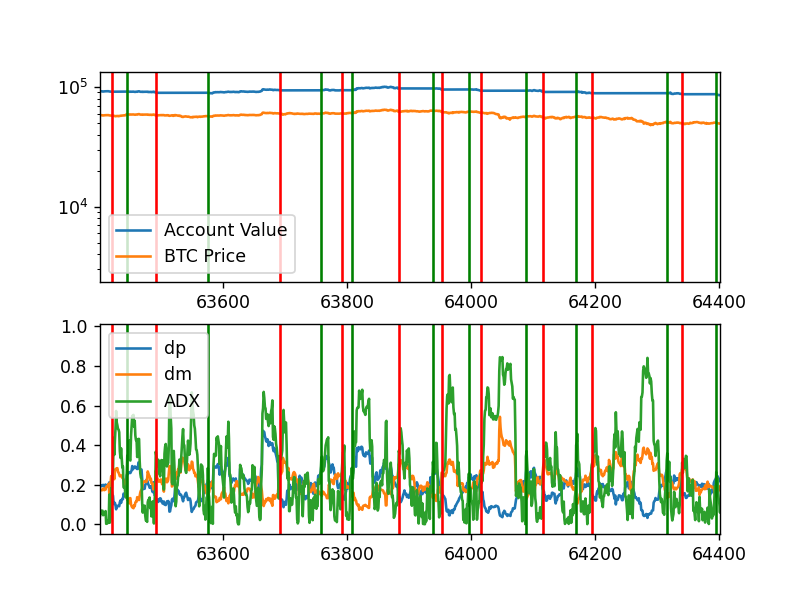

interactive(children=(FloatSlider(value=1.0, description='w', max=70258.0, min=1.0, step=100.0), Output()), _d…

<function __main__.update(w)>

In [22]:
%matplotlib notebook
from ipywidgets import *

def update(w):
    x = 1000
    ax1.set_xlim(w, w + x)
    ax2.set_xlim(w, w + x)
#     ax3.set_xlim(w, w + x)

csv_path = "test.csv"

df = pd.read_csv(csv_path)

ax1 = plt.subplot(2,1,1)
ax1.set_yscale("log")
ax1.plot(df['Account Value'], label = "Account Value")
ax1.plot(df['Price'], label = "BTC Price")
for i, e in enumerate(df['Action']):
    if e == "SELL":
        ax1.axvline(x=i, color="red")
    elif e == "BUY":
        ax1.axvline(x=i, color="green")
    elif e == "RESET":
        ax1.axvline(x=i, color="yellow")
plt.legend()

ax2 = plt.subplot(2,1,2)
ax2.plot(df['dp'], label = "dp")
ax2.plot(df['dm'], label = "dm")
ax2.plot(df['ADX'], label = "ADX")
for i, e in enumerate(df['Action']):
    if e == "SELL":
        ax2.axvline(x=i, color="red")
    elif e == "BUY":
        ax2.axvline(x=i, color="green")
    elif e == "RESET":
        ax2.axvline(x=i, color="yellow")
plt.legend()

# ax3 = plt.subplot(3,1,3)
# # ax3.plot(df['K'], label = "K")
# ax3.plot(df['dpa'], label = "dpa")
# ax3.plot(df['dma'], label = "dma")
# for i, e in enumerate(df['Action']):
#     if e == "SELL":
#         ax3.axvline(x=i, color="red")
#     elif e == "BUY":
#         ax3.axvline(x=i, color="green")
#     elif e == "RESET":
#         ax3.axvline(x=i, color="yellow")
# plt.legend()

interact(update, w = widgets.FloatSlider(value=1, min=1, max=len(df), step=100))

In [21]:
#     # BUY
#     if(last_trade_type != "BUY" and k_curr < d_curr and dplus > 0.25):
#         out = "Trying to buy..."
#         quantity = truncate(((acc_usdt)/price), 6)
#         if quantity > 0.0001:
#             acc_usdt, acc_btc = buy_t(acc_usdt, acc_btc, price, quantity)
#             out = out + "Bought " + str(quantity) + "BTC at " + str(price)
#             trade_type = "BUY"
#         else:
#             out = out + "Trade too small"
#             trade = False
#     # SELL
#     elif(last_trade_type != "SELL" and k_curr > d_curr and dminus > 0.25):
#         out = "Trying to sell..."
#         quantity = truncate(acc_btc, 6)
#         if quantity > 0.0001:
#             acc_usdt, acc_btc = sell_t(acc_usdt, acc_btc, price, quantity)
#             out = out + "Sold " + str(quantity) + "BTC at " + str(price)
#             trade_type = "SELL"
#         else:
#             out = out + "Trade too small"
#             trade = False